In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def plot_prediction(ts, n_samples=10, seed=None, print_x=False):
    random.seed(seed)
    
    X = np.load(f"./preds/x-{ts}.npy")
    y_t = np.load(f"./preds/y_true-{ts}.npy")
    y_p = np.load(f"./preds/y_pred-{ts}.npy")

    print(X.shape, y_t.shape, y_p.shape)

    n_samples = min(n_samples, len(X))
    sample_indices = random.sample(range(len(X)), n_samples)
    colors = plt.cm.rainbow(np.linspace(0, 1, n_samples))
    
    plt.figure(figsize=(20, 8))
    
    for i, idx in enumerate(sample_indices):
        t = range(len(X[idx]))
        if print_x:
            plt.plot(t, X[idx], color=colors[i], linestyle='-', alpha=0.4, linewidth=0.5, label=f'Input {idx}')
        plt.plot(t, y_t[idx], color=colors[i], linestyle='-', alpha=0.7, label=f'True Sequence {idx}')
        plt.plot(t, y_p[idx], color=colors[i], linestyle='--', alpha=0.7, label=f'Predicted {idx}')
    
    plt.xticks(np.arange(0, len(y_t[0]), step=max(1, len(y_t[0])//20)))
    plt.title(f'True vs Predicted Values (Sample of {n_samples} sequences)')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    if n_samples < 10:
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

(3786, 284, 1) (3786, 284) (3786, 284)


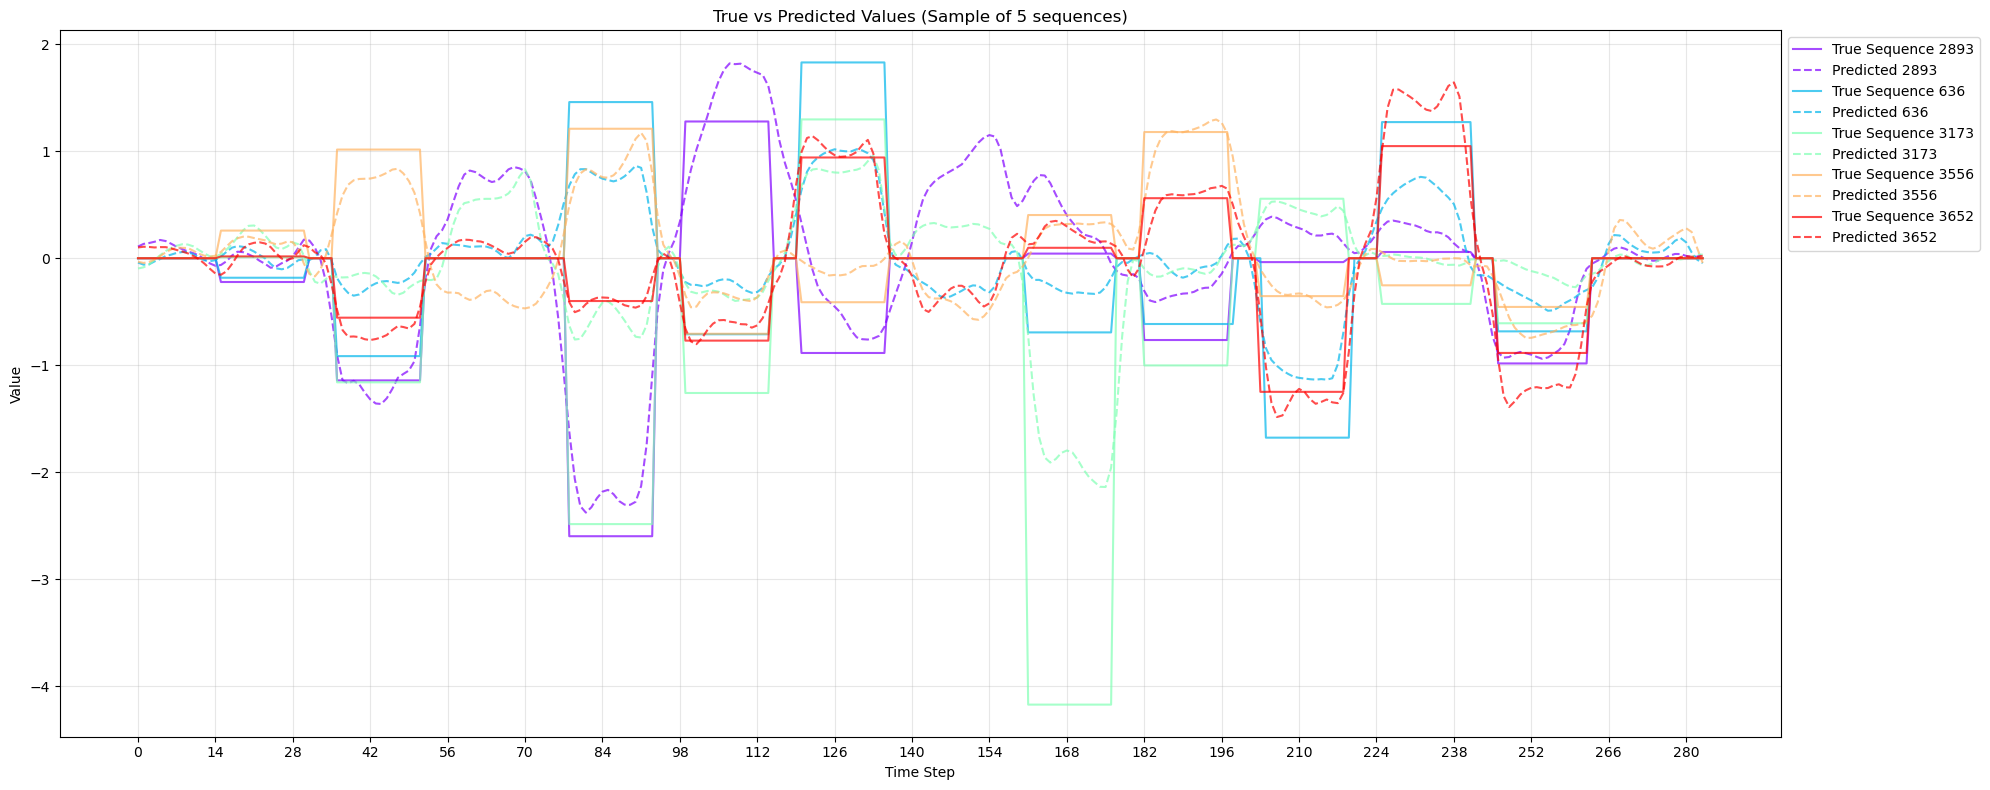

In [58]:
plot_prediction("20241202_214325", n_samples=5)

(3802, 568, 1) (3802, 568) (3802, 568)


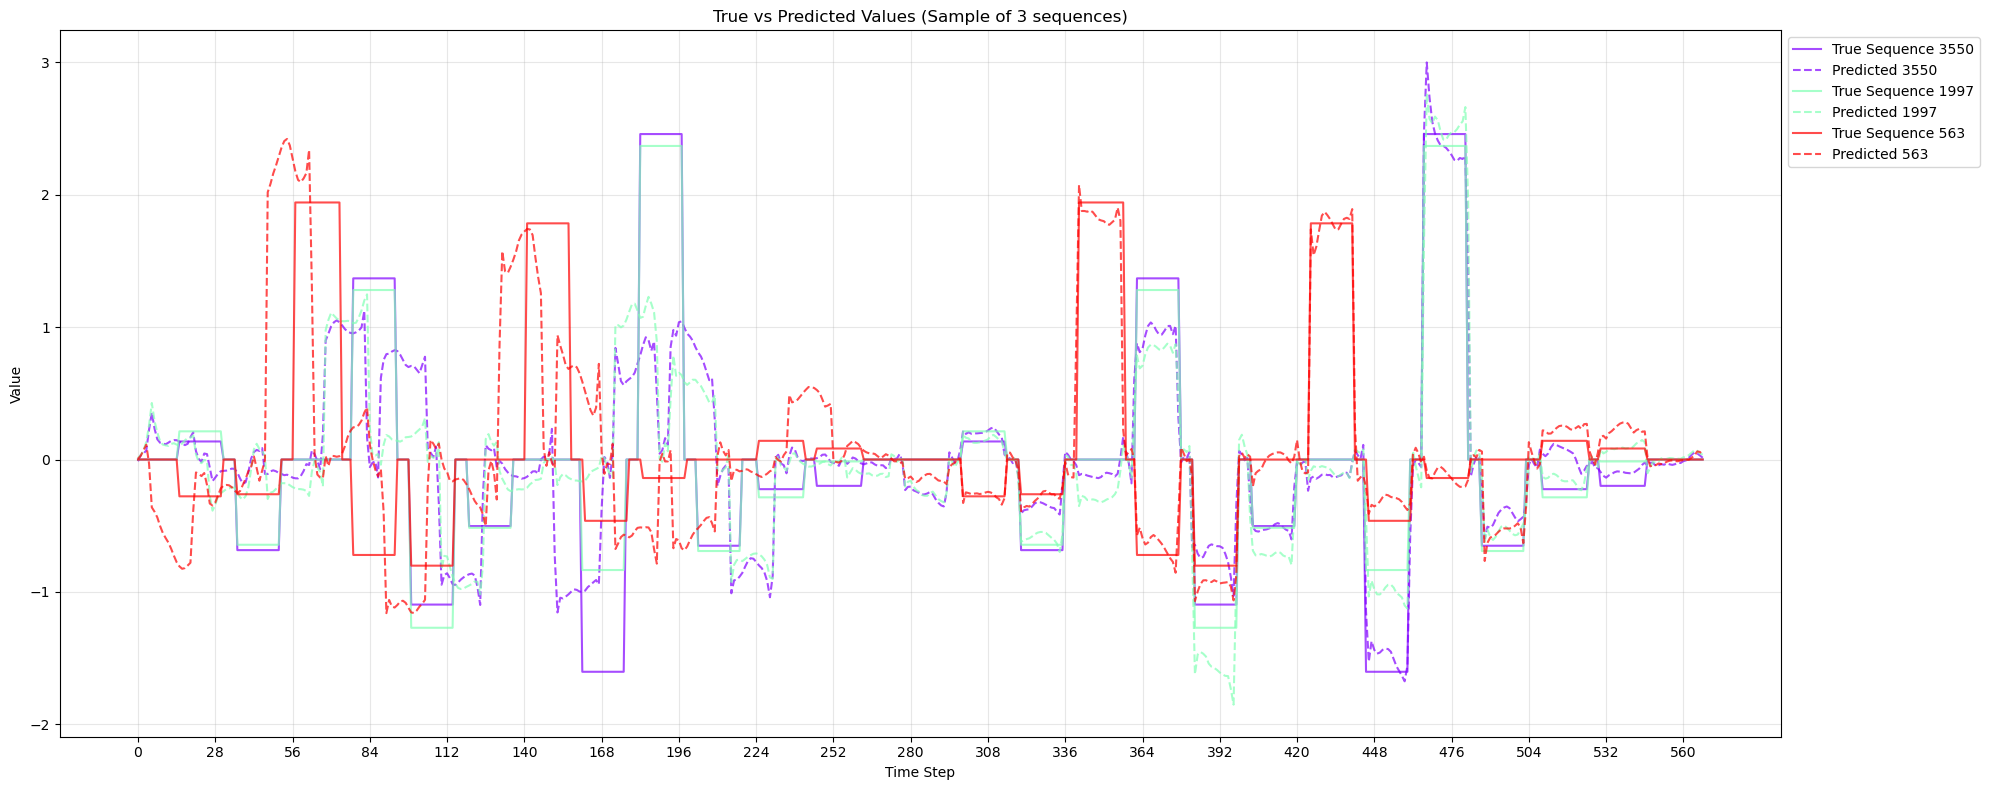

In [74]:
plot_prediction("20241202_222329", n_samples=3)

(3738, 568, 1) (3738, 568) (3738, 568)


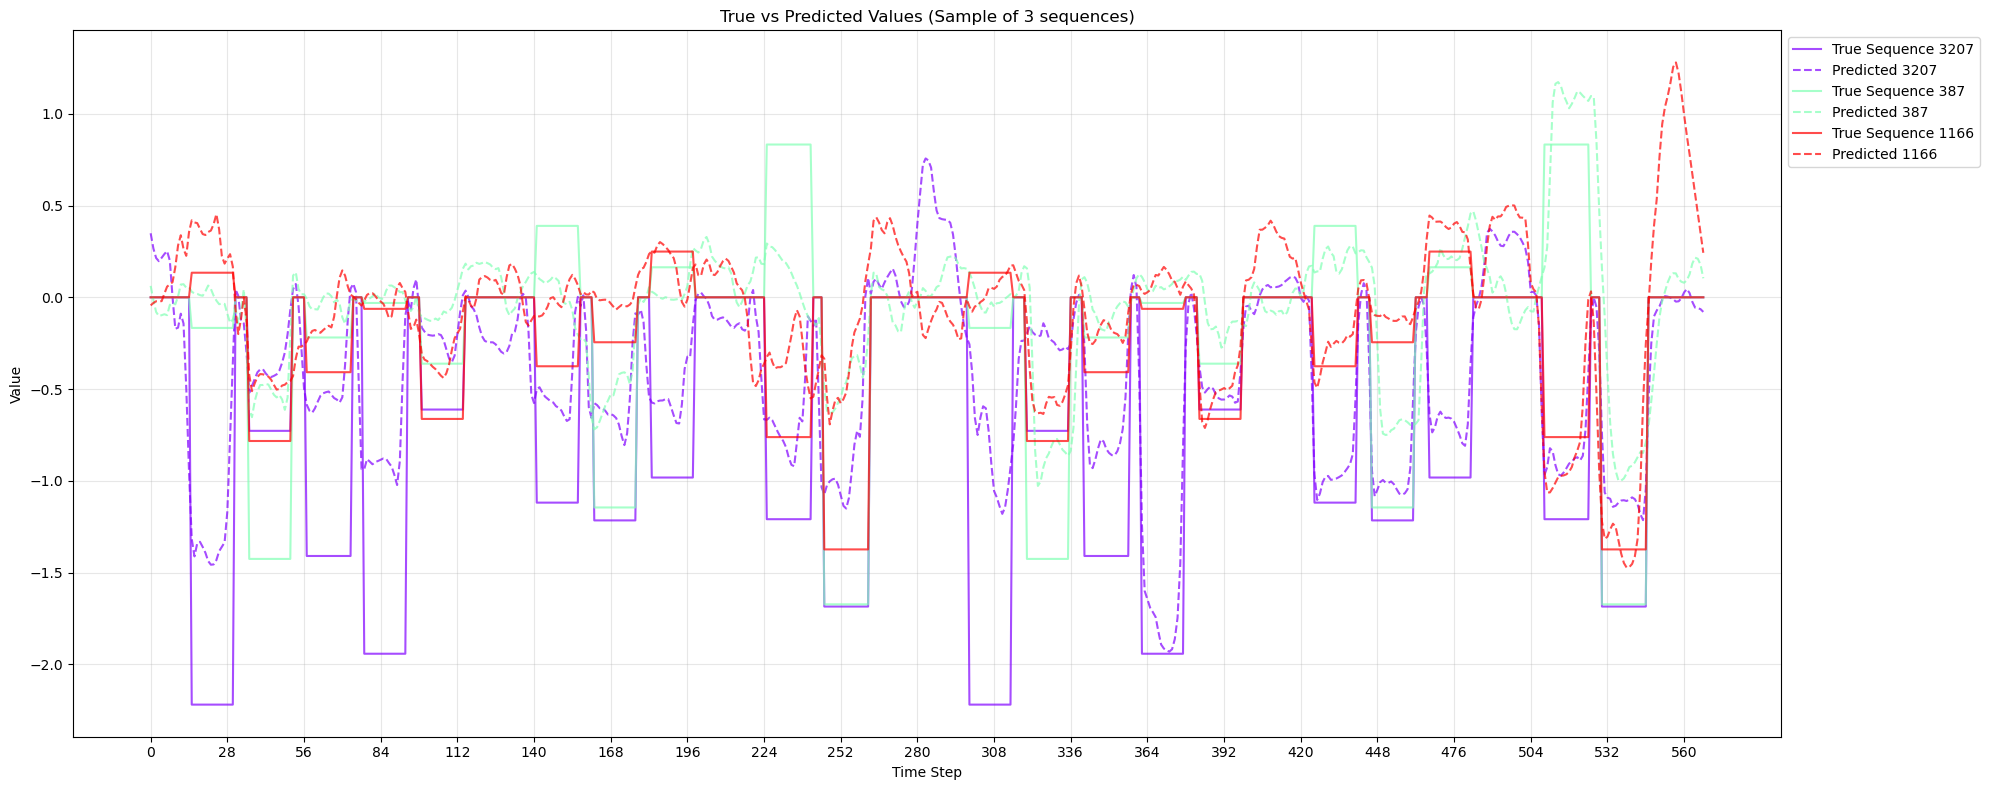

In [84]:
plot_prediction("20241202_234927", n_samples=3)

(3768, 568, 1) (3768, 568) (3768, 568)


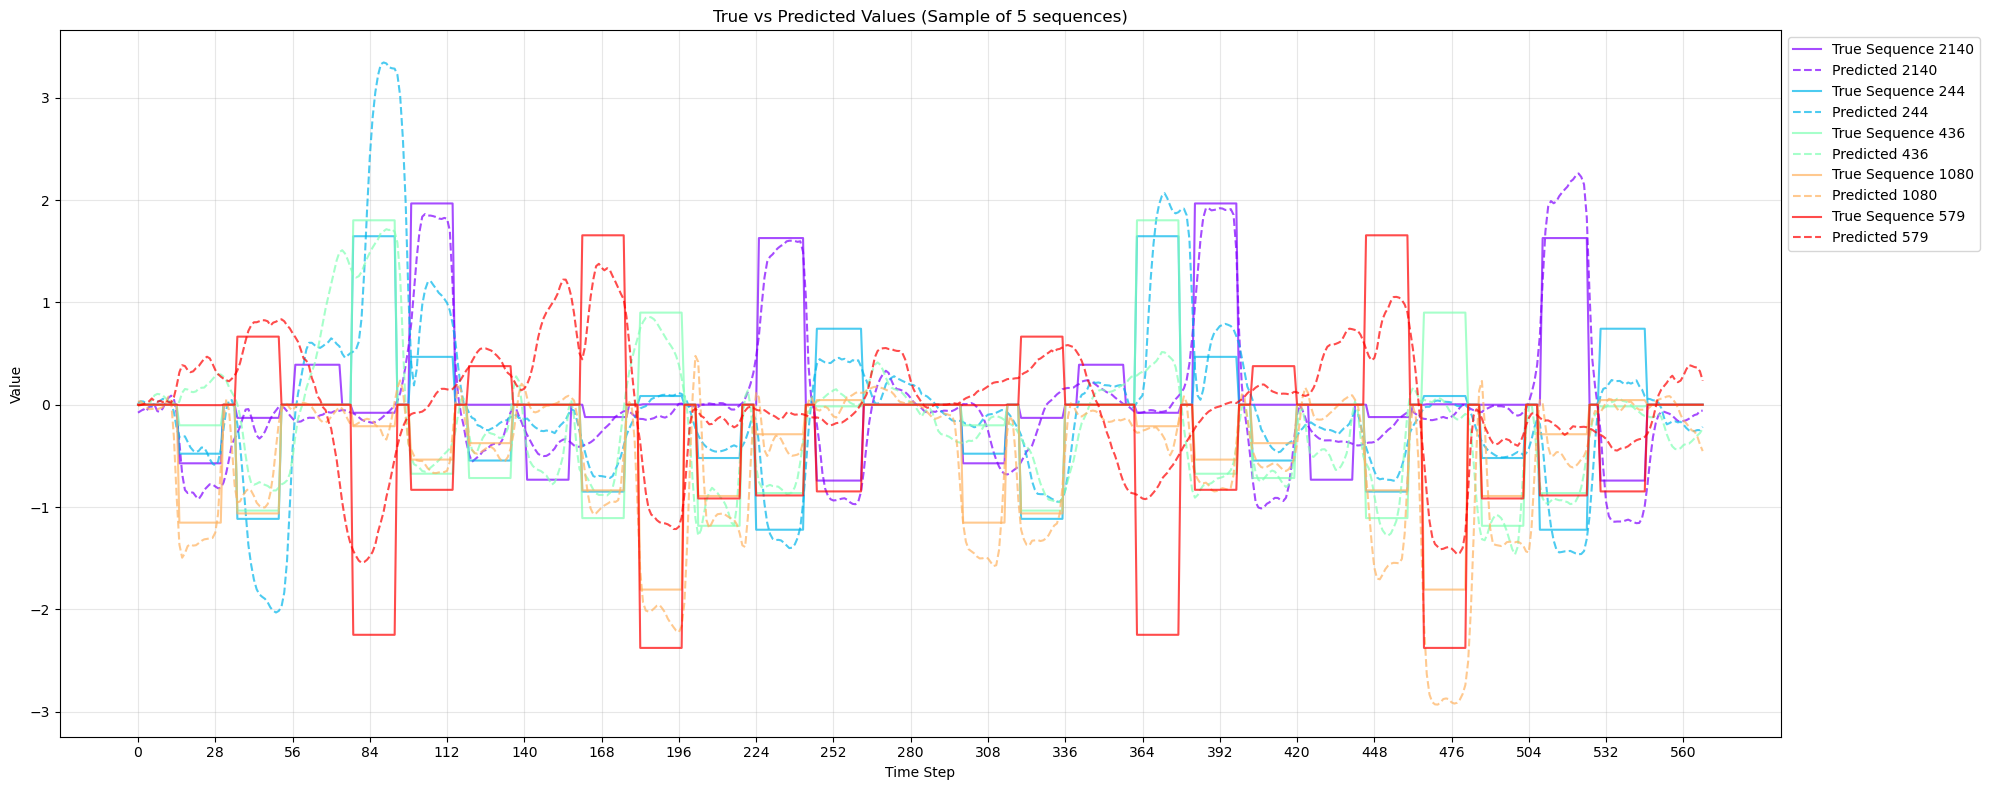

In [6]:
plot_prediction("20241203_153230", n_samples=5)

(3768, 568, 1) (3768, 568) (3768, 568, 1)


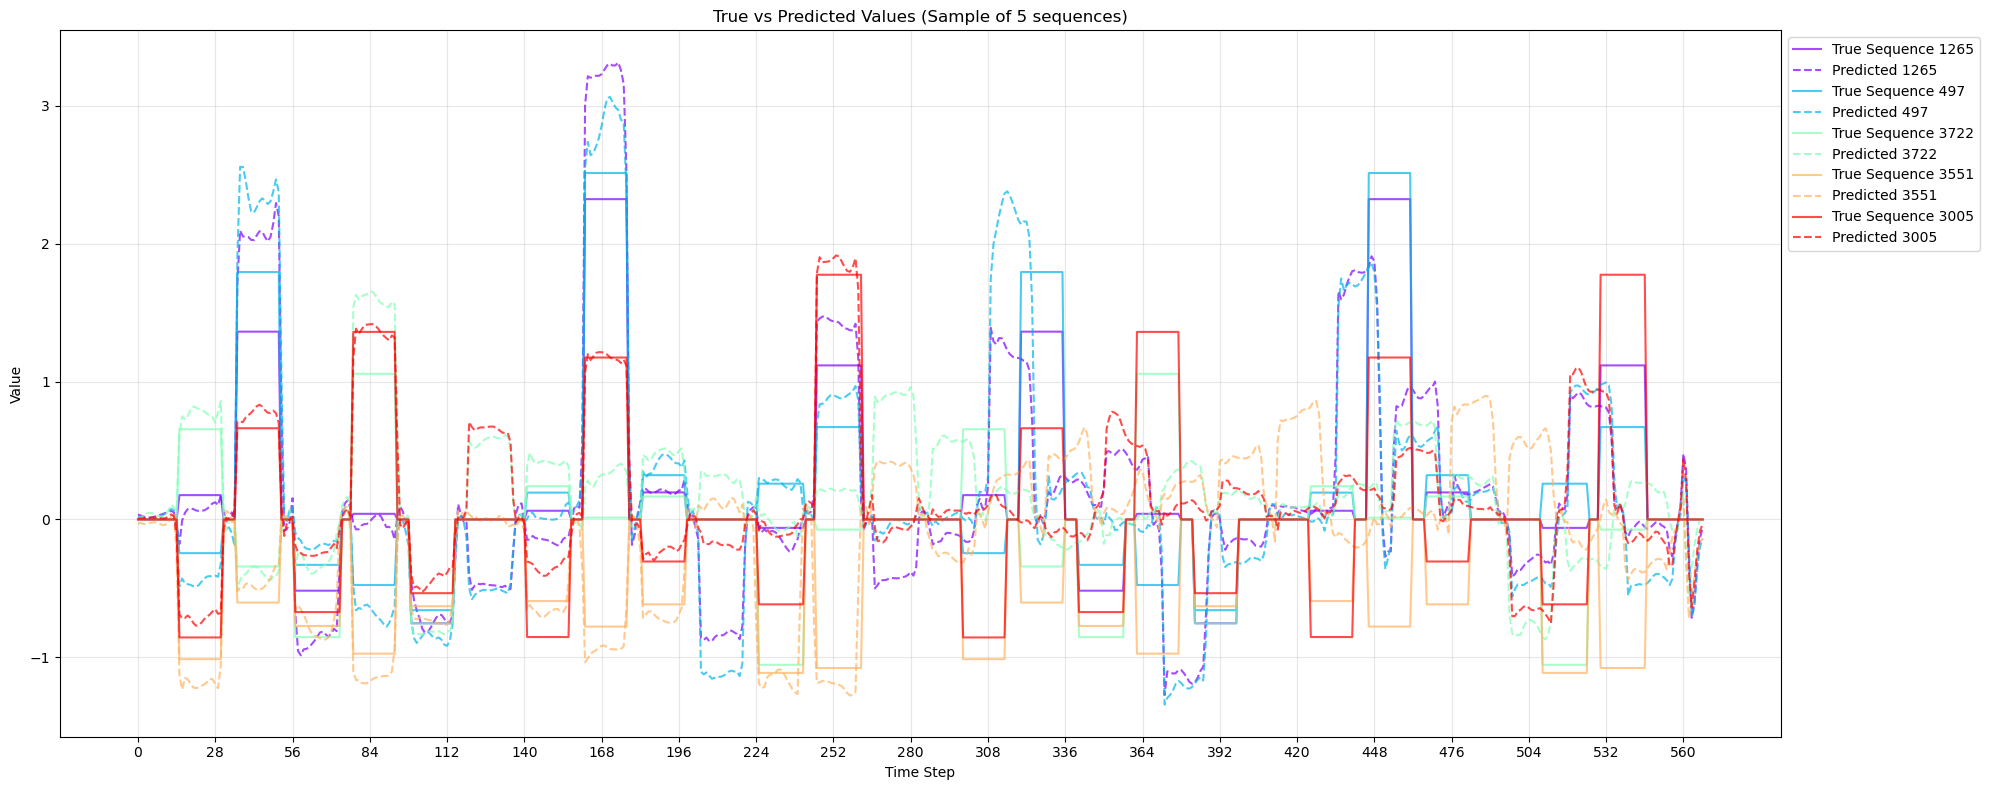

In [6]:
plot_prediction("20241214_015128", n_samples=5)

(3708, 352, 1) (3708, 352) (3708, 352, 1)


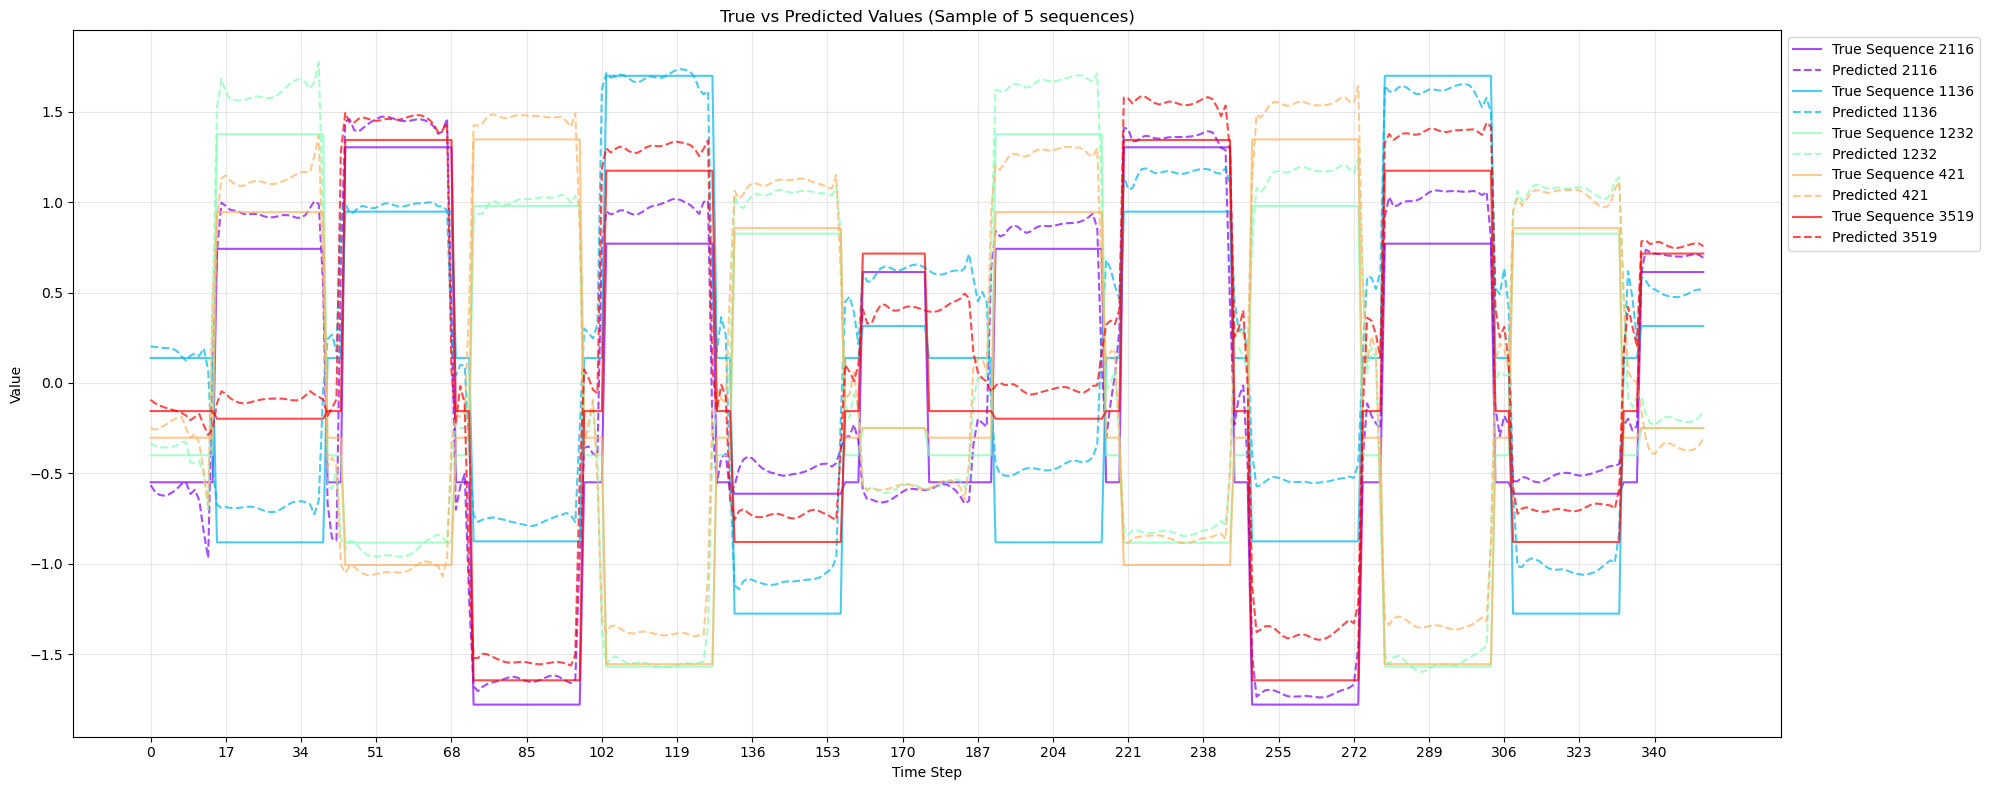

In [7]:
# train-test  dataset_EMOTION_100_subjects_normed

plot_prediction("20241214_015553", n_samples=5)

(3348, 632, 1) (3348, 632) (3348, 632, 1)


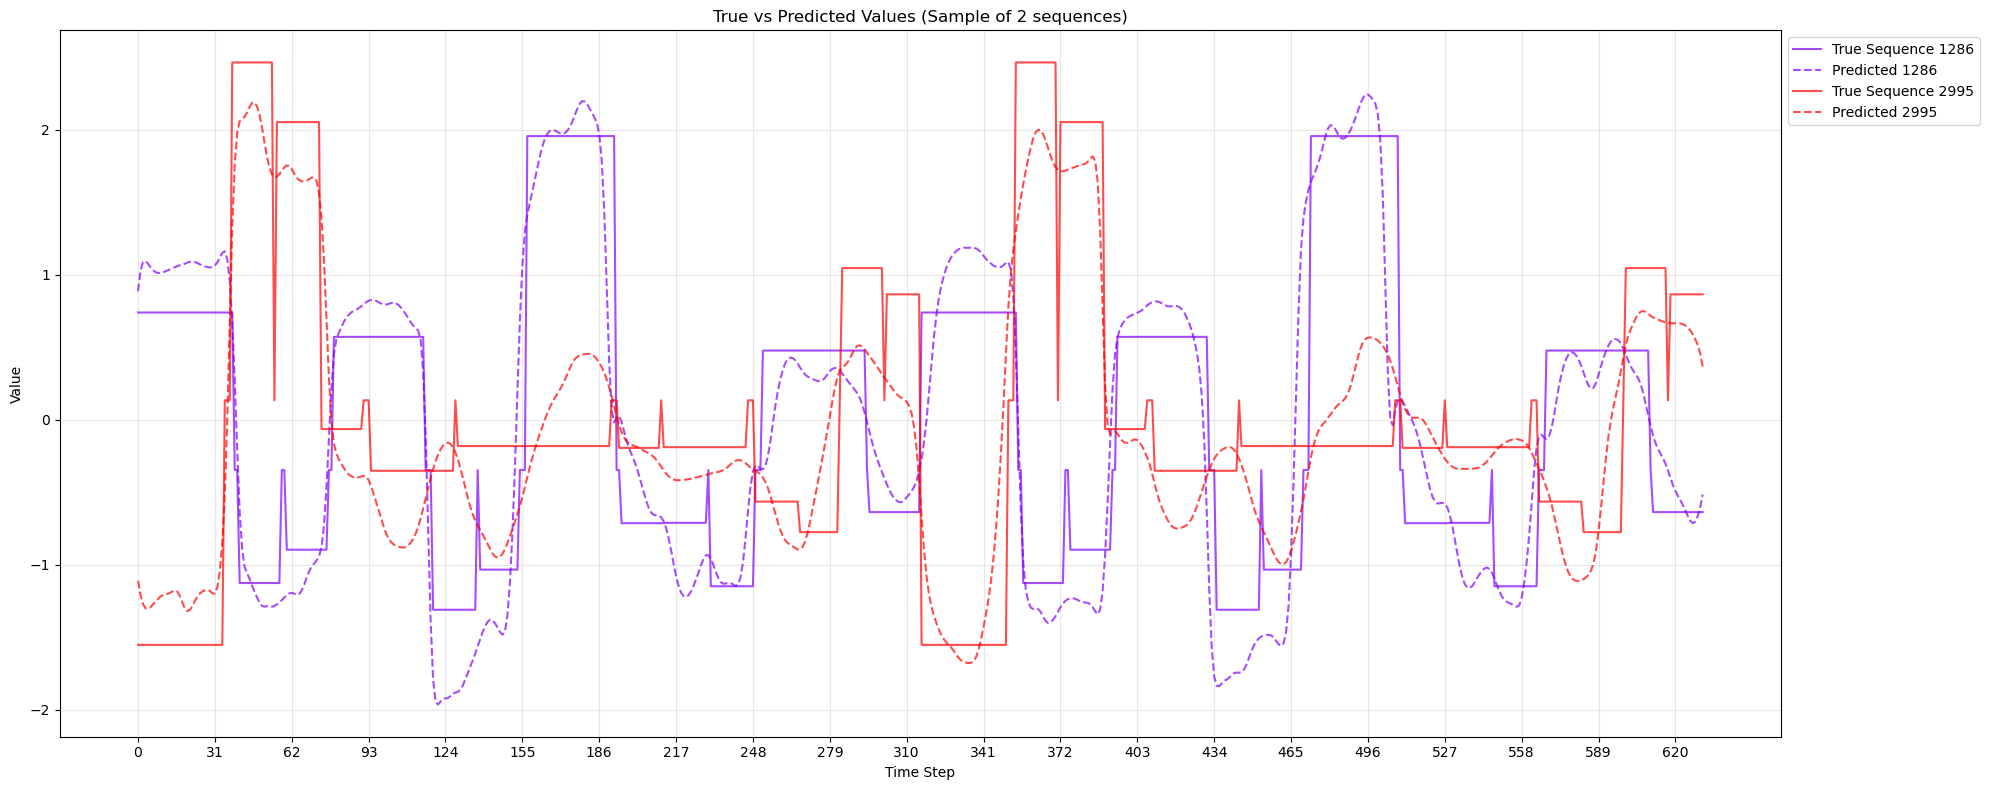

In [19]:
# train-test dataset_LANGUAGE_100_subjects_normed

plot_prediction("20241214_020215", n_samples=2)

(3708, 464, 1) (3708, 464) (3708, 464, 1)


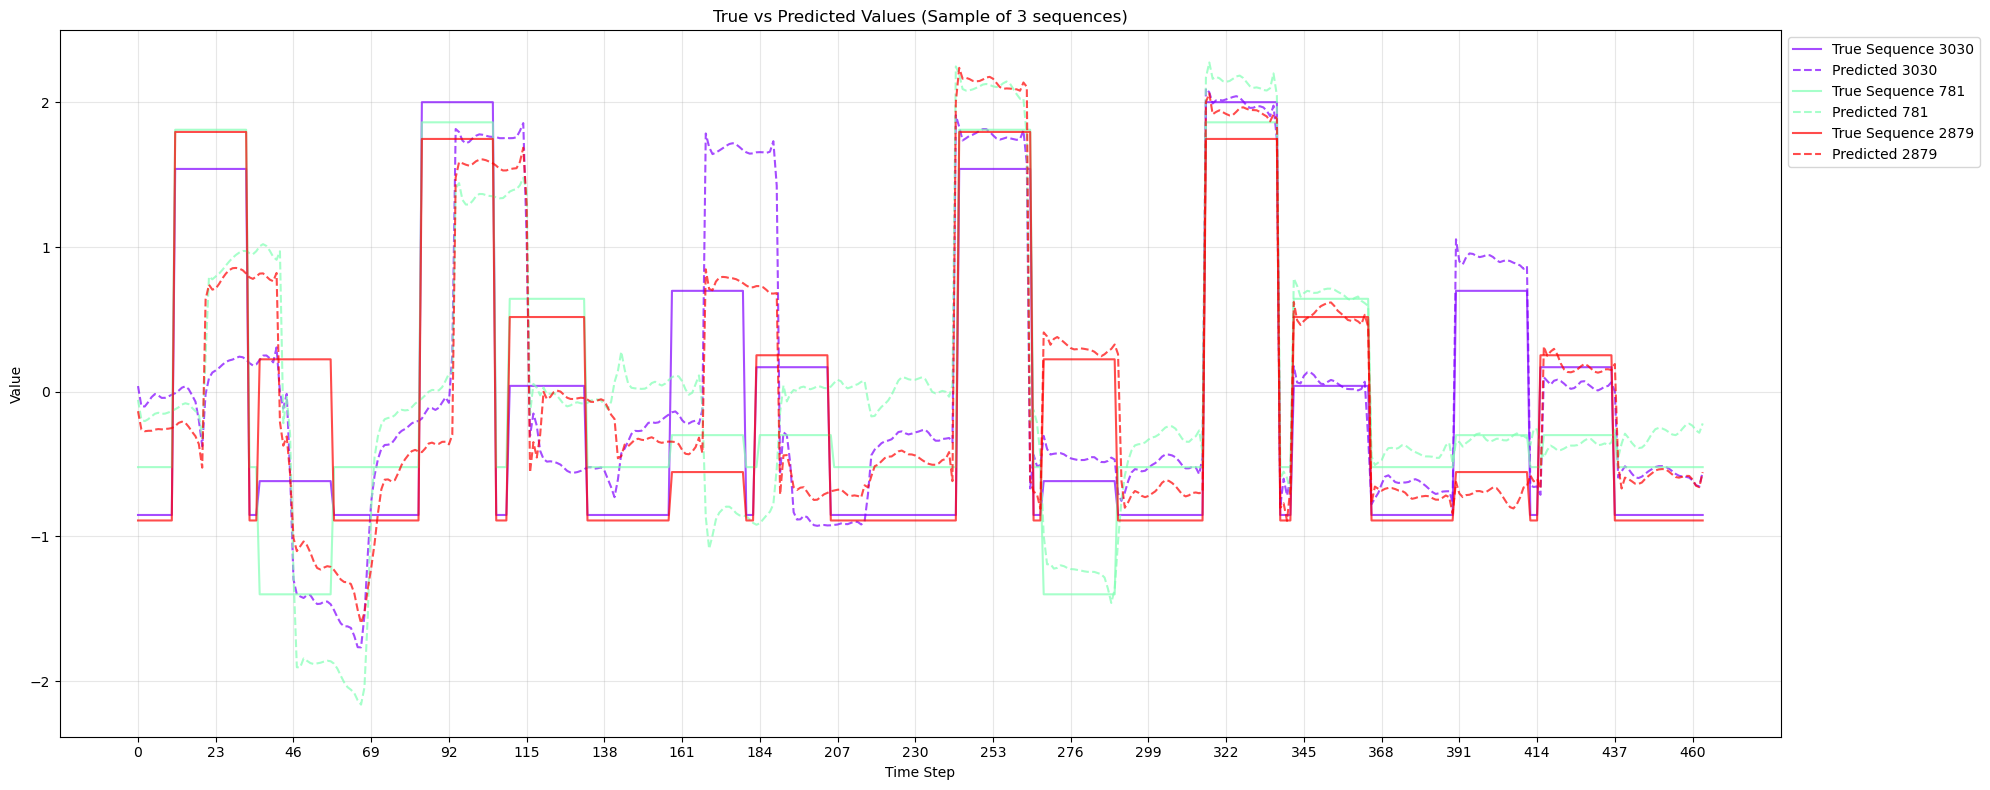

In [35]:
# train-2xtest dataset_RELATIONAL_100_subjects_normed

plot_prediction("20241214_020552", n_samples=3)

(9894, 232, 1) (9894, 232) (9894, 232, 1)


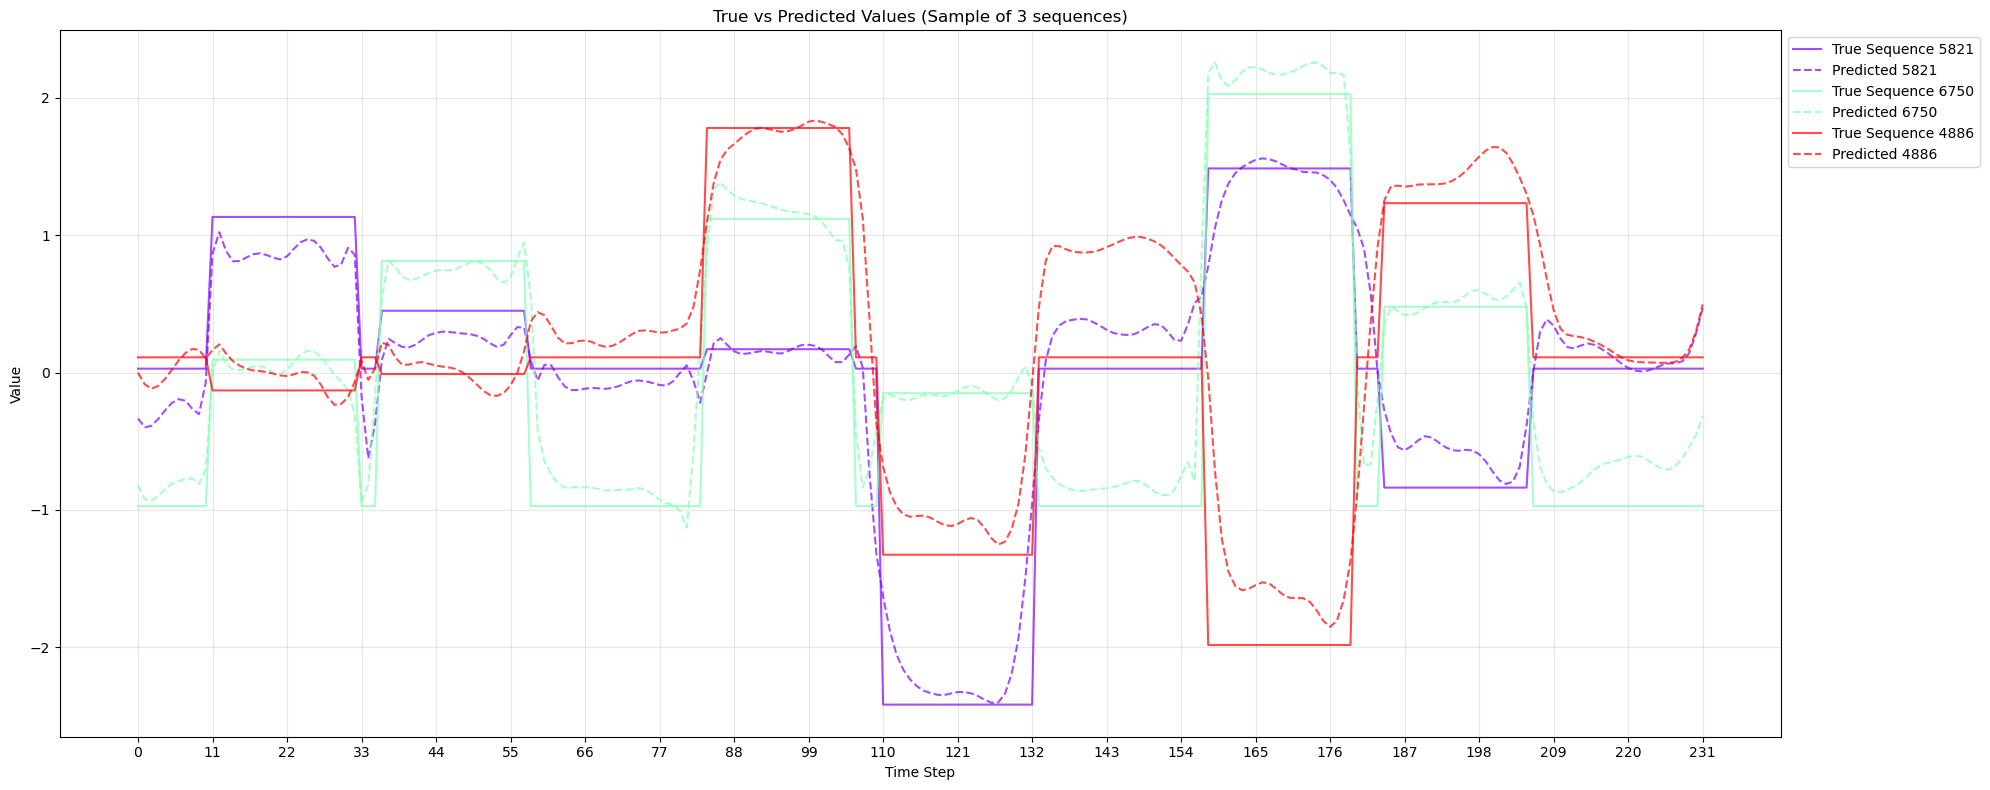

In [37]:
# train-test dataset_RELATIONAL_100_subjects_normed

plot_prediction("20241214_021504", n_samples=3)

(16610, 464, 1) (16610, 464) (16610, 464, 1)


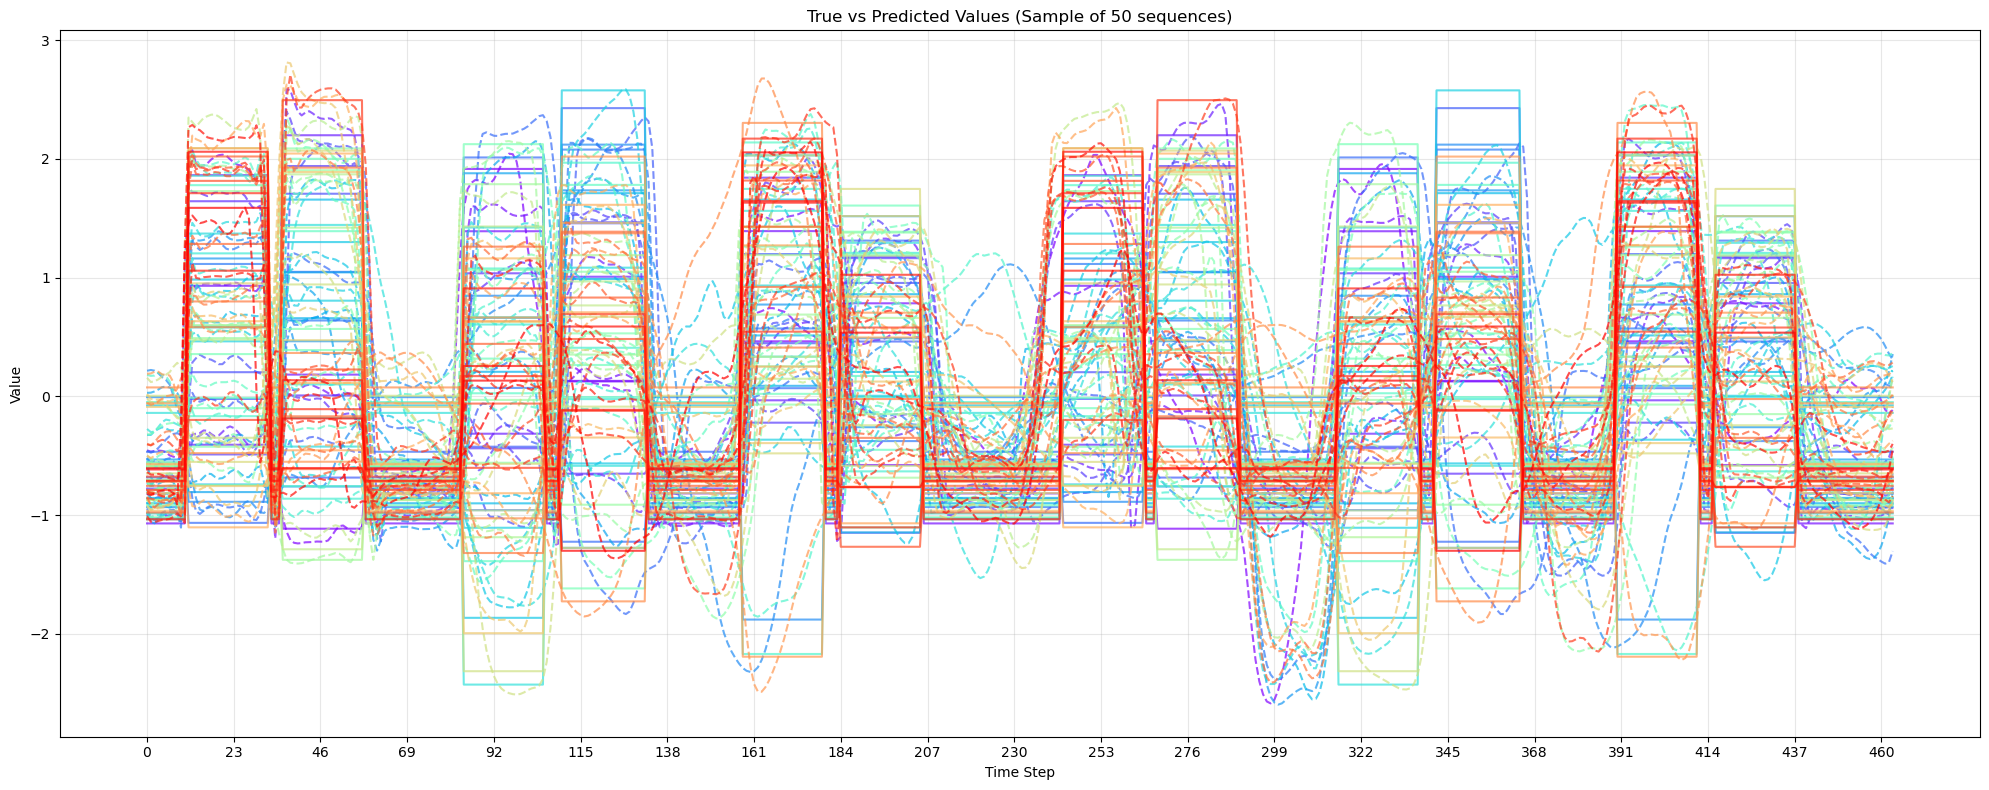

In [61]:
# train-test dataset_RELATIONAL_100_subjects_normed

plot_prediction("20241214_023410", n_samples=50)

(50220, 632, 1) (50220, 632) (50220, 632, 1)


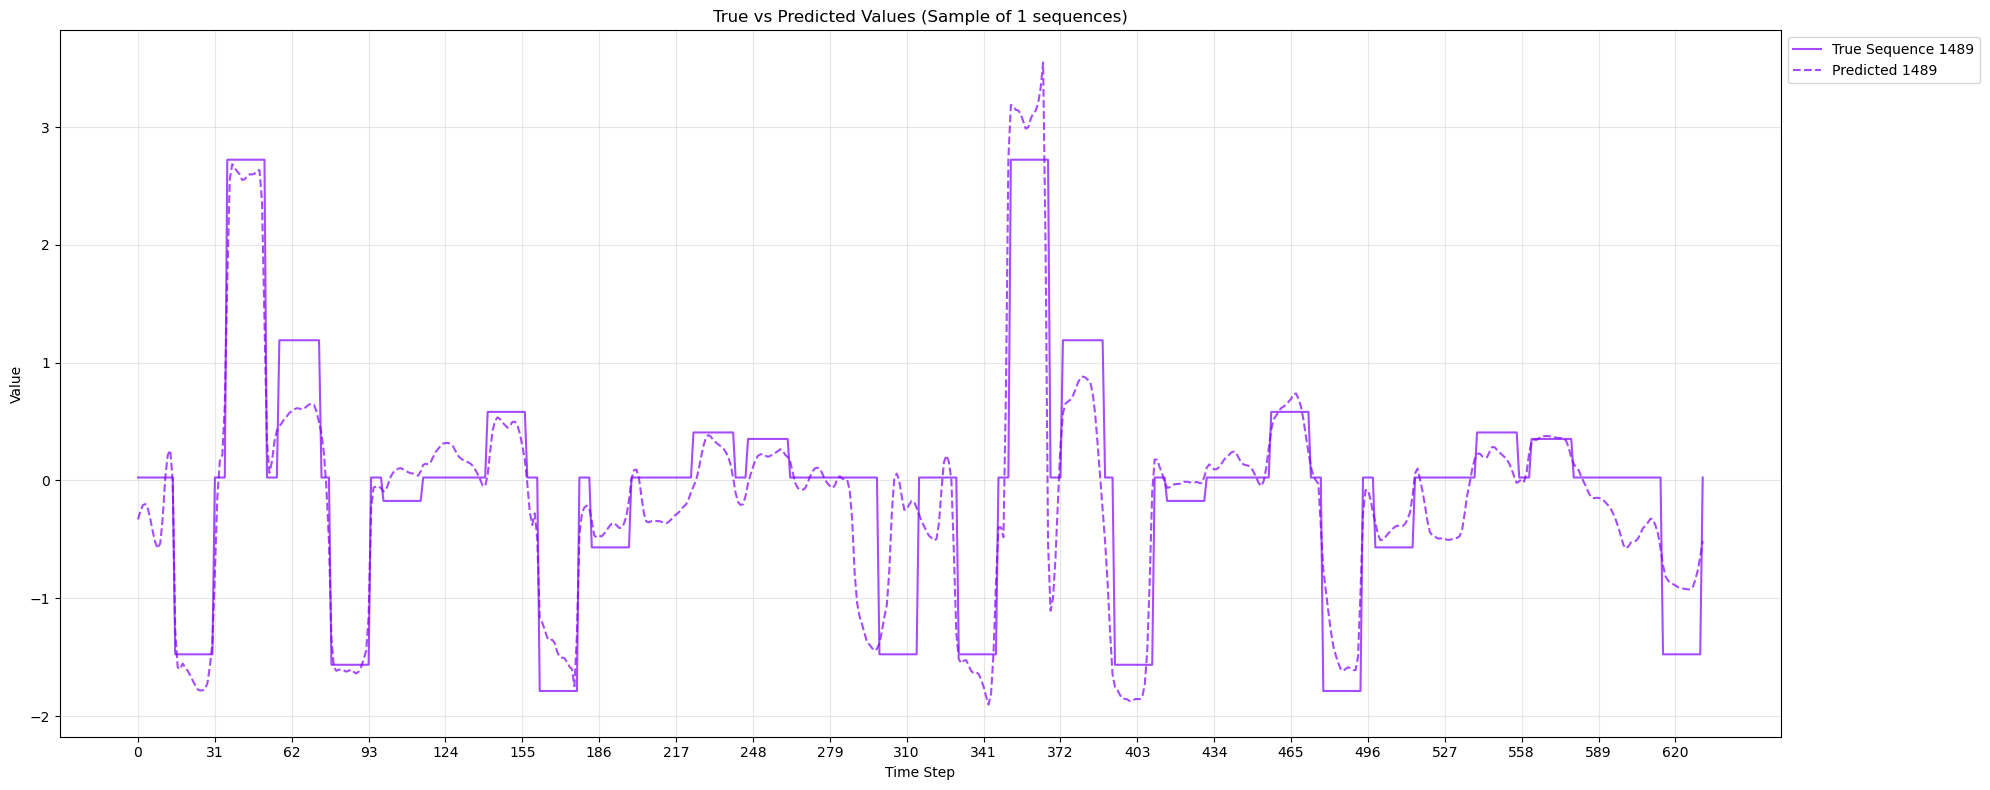

In [90]:
# train-test dataset_MIXED MOTOR-LANGUAGE-EMOTION

plot_prediction("20241215_131742", n_samples=1)

(50220, 632, 1) (50220, 632) (50220, 632, 1)


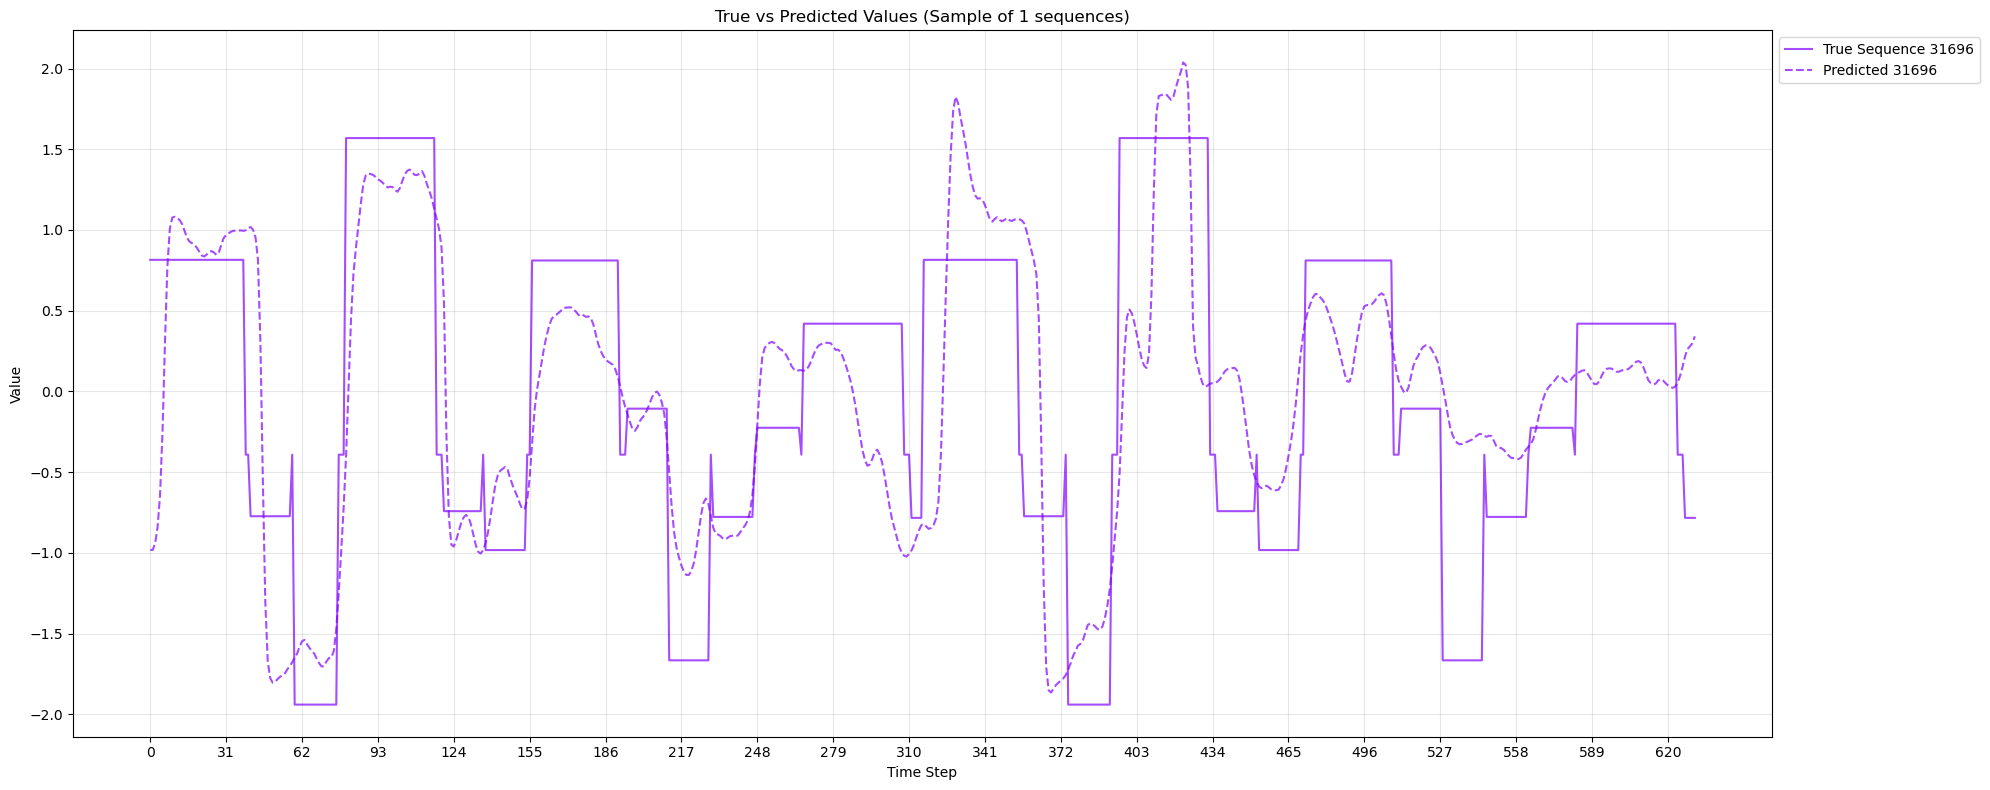

In [91]:
plot_prediction("20241215_131742", n_samples=1)

(50220, 632, 1) (50220, 632) (50220, 632, 1)


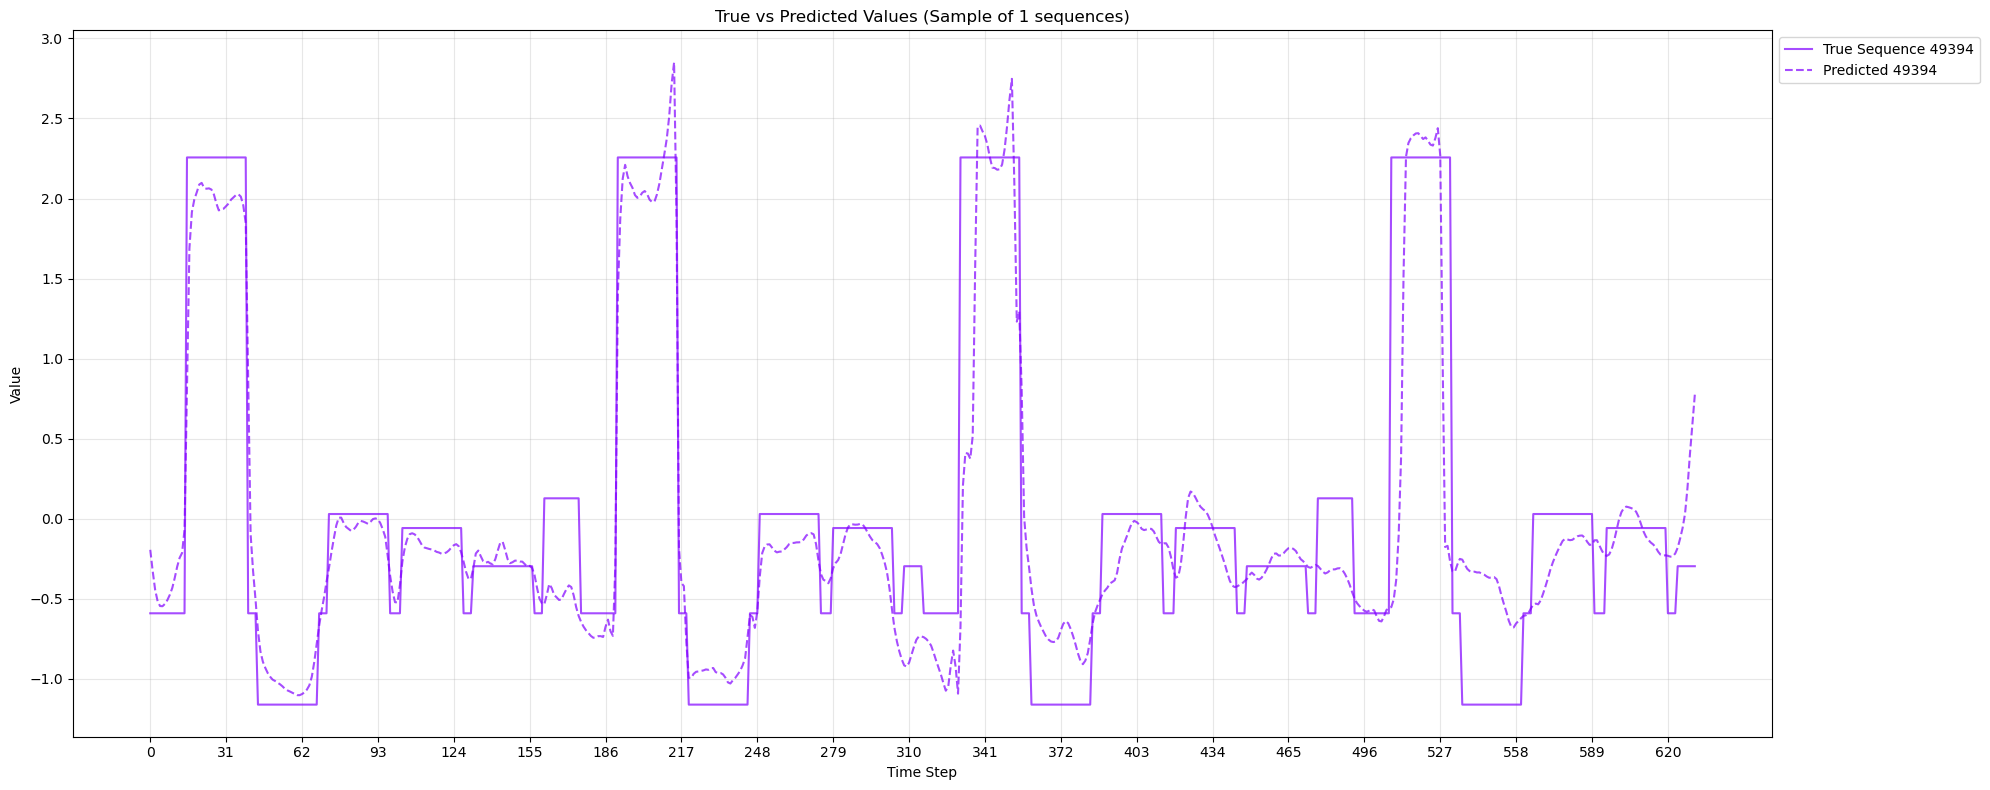

In [100]:
plot_prediction("20241215_131742", n_samples=1)

In [101]:
from matplotlib.backends.backend_pdf import PdfPages

In [119]:
def prediction_pdf(ts, n_samples=10, seed=None, print_x=False):
    random.seed(seed)
    
    X = np.load(f"./preds/x-{ts}.npy")
    y_t = np.load(f"./preds/y_true-{ts}.npy")
    y_p = np.load(f"./preds/y_pred-{ts}.npy")

    print(X.shape, y_t.shape, y_p.shape)

    n_samples = min(n_samples, len(X))
    sample_indices = random.sample(range(len(X)), n_samples)
    colors = plt.cm.rainbow(np.linspace(0, 1, n_samples))

    with PdfPages(f'{ts}-motor-language-emotion-wm-100subjs.pdf') as pdf:
        for i in range(0, len(sample_indices), 3):
            plt.figure(figsize=(20, 24))
            
            for j in range(min(3, len(sample_indices) - i)):
                plt.subplot(3, 1, j+1)
                idx = sample_indices[i+j]
                t = range(len(X[idx]))
                
                if print_x:
                    plt.plot(t, X[idx], color='blue', linestyle='-', alpha=0.4, linewidth=0.5, label=f'Input {idx}')
                plt.plot(t, y_t[idx], color='orange', linestyle='-', alpha=0.8, label=f'True Sequence {idx}')
                plt.plot(t, y_p[idx], color='green', linestyle='--', alpha=0.8, label=f'Predicted {idx}')
                
                plt.xticks(np.arange(0, len(y_t[0]), step=max(1, len(y_t[0])//20)))
                plt.title(f'Sample {idx}')
                plt.xlabel('Time Step')
                plt.ylabel('Value')
                plt.grid(True, alpha=0.3)
                if n_samples < 10 or True:
                    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
            
            plt.tight_layout()
            pdf.savefig()
            plt.close()

In [120]:
prediction_pdf("20241215_205956", n_samples=99, print_x=True)

(85920, 810, 1) (85920, 810) (85920, 810, 1)


(85920, 810, 1) (85920, 810) (85920, 810, 1)


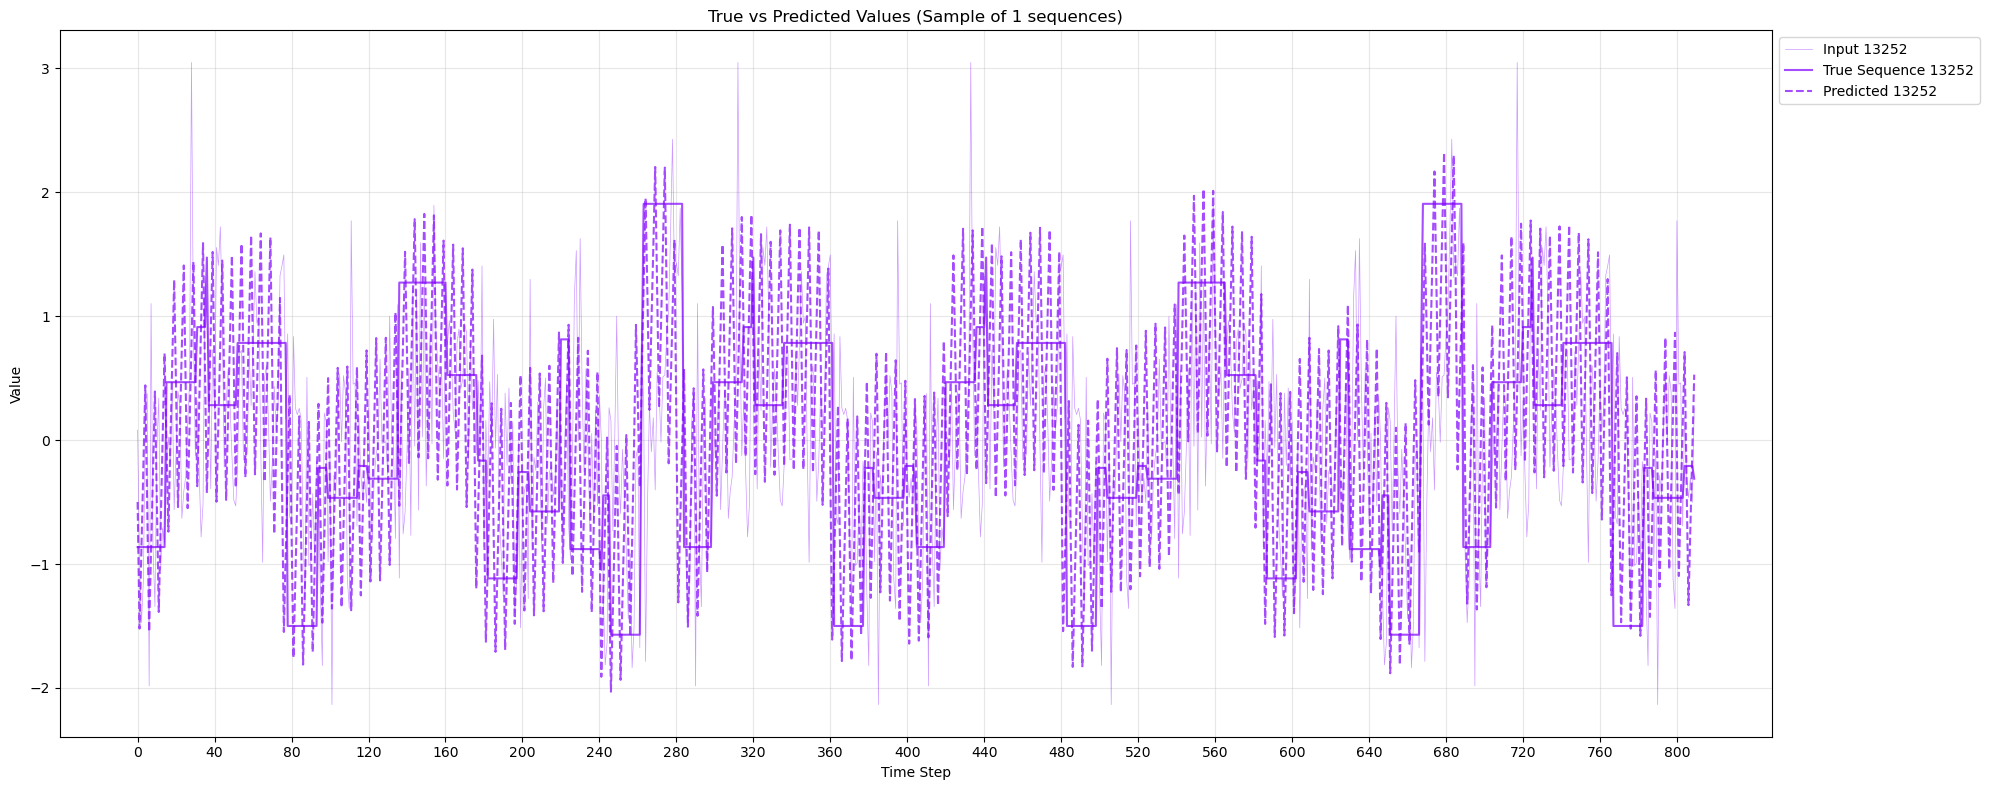

In [132]:
plot_prediction("20241215_205956", n_samples=1, print_x=True)

(107400, 810, 1) (107400, 810) (107400, 810, 1)


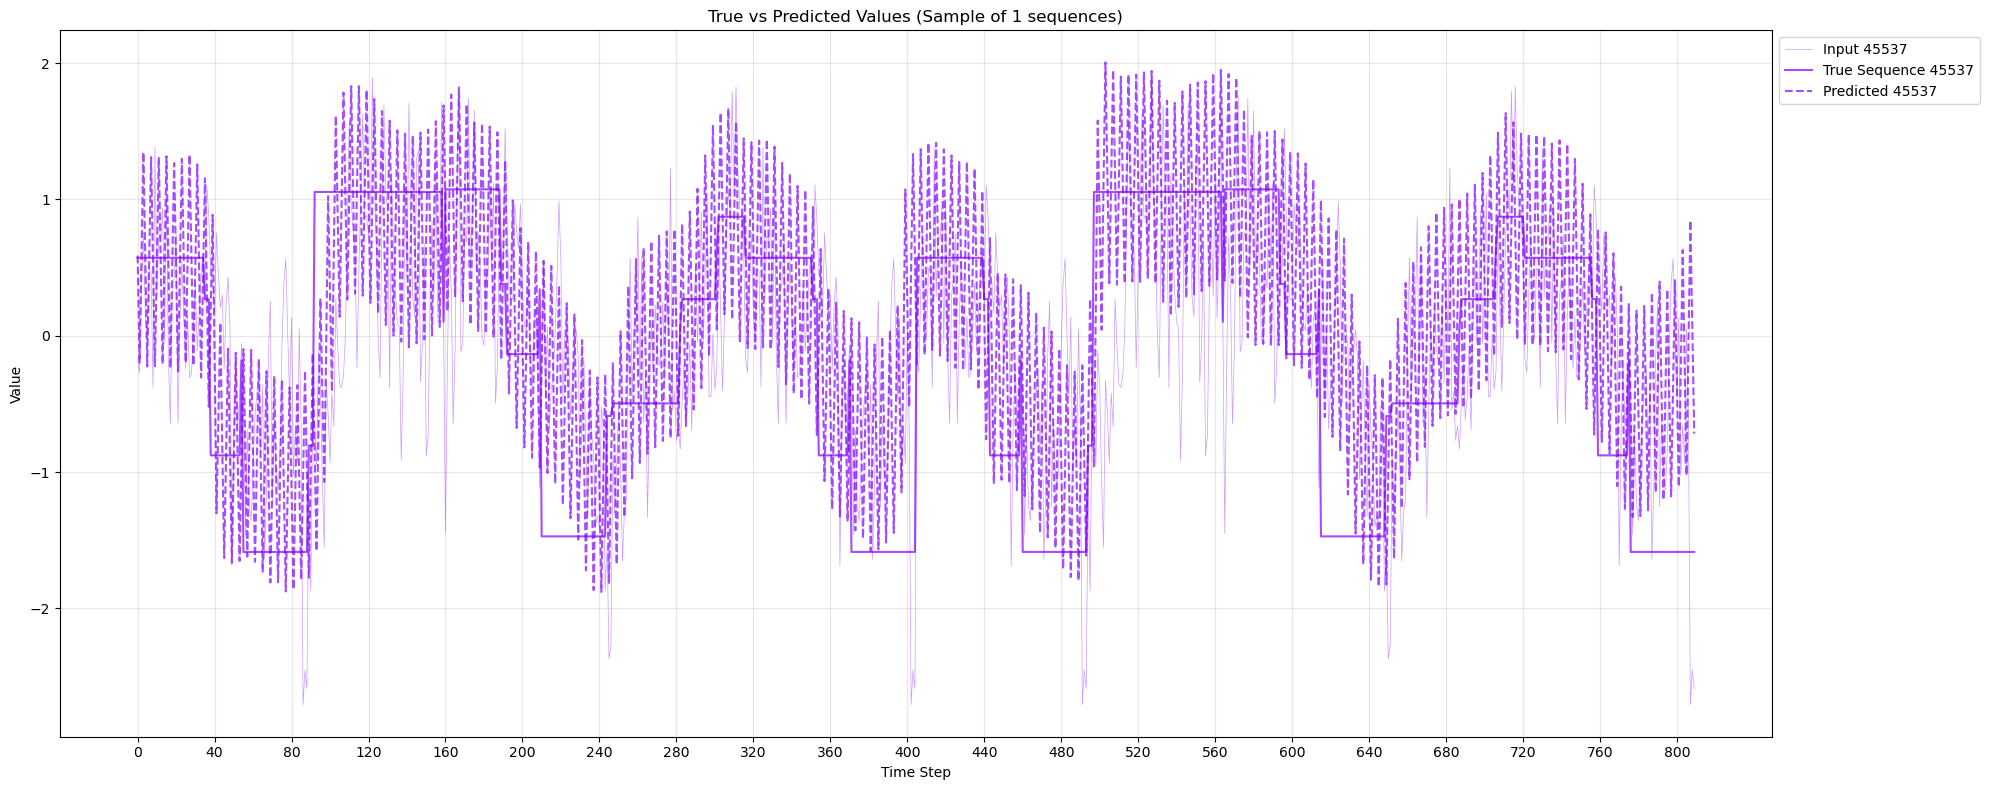

In [148]:
plot_prediction("20241216_001423", n_samples=1, print_x=True)

(8980, 810, 1) (8980, 810) (8980, 810, 1)


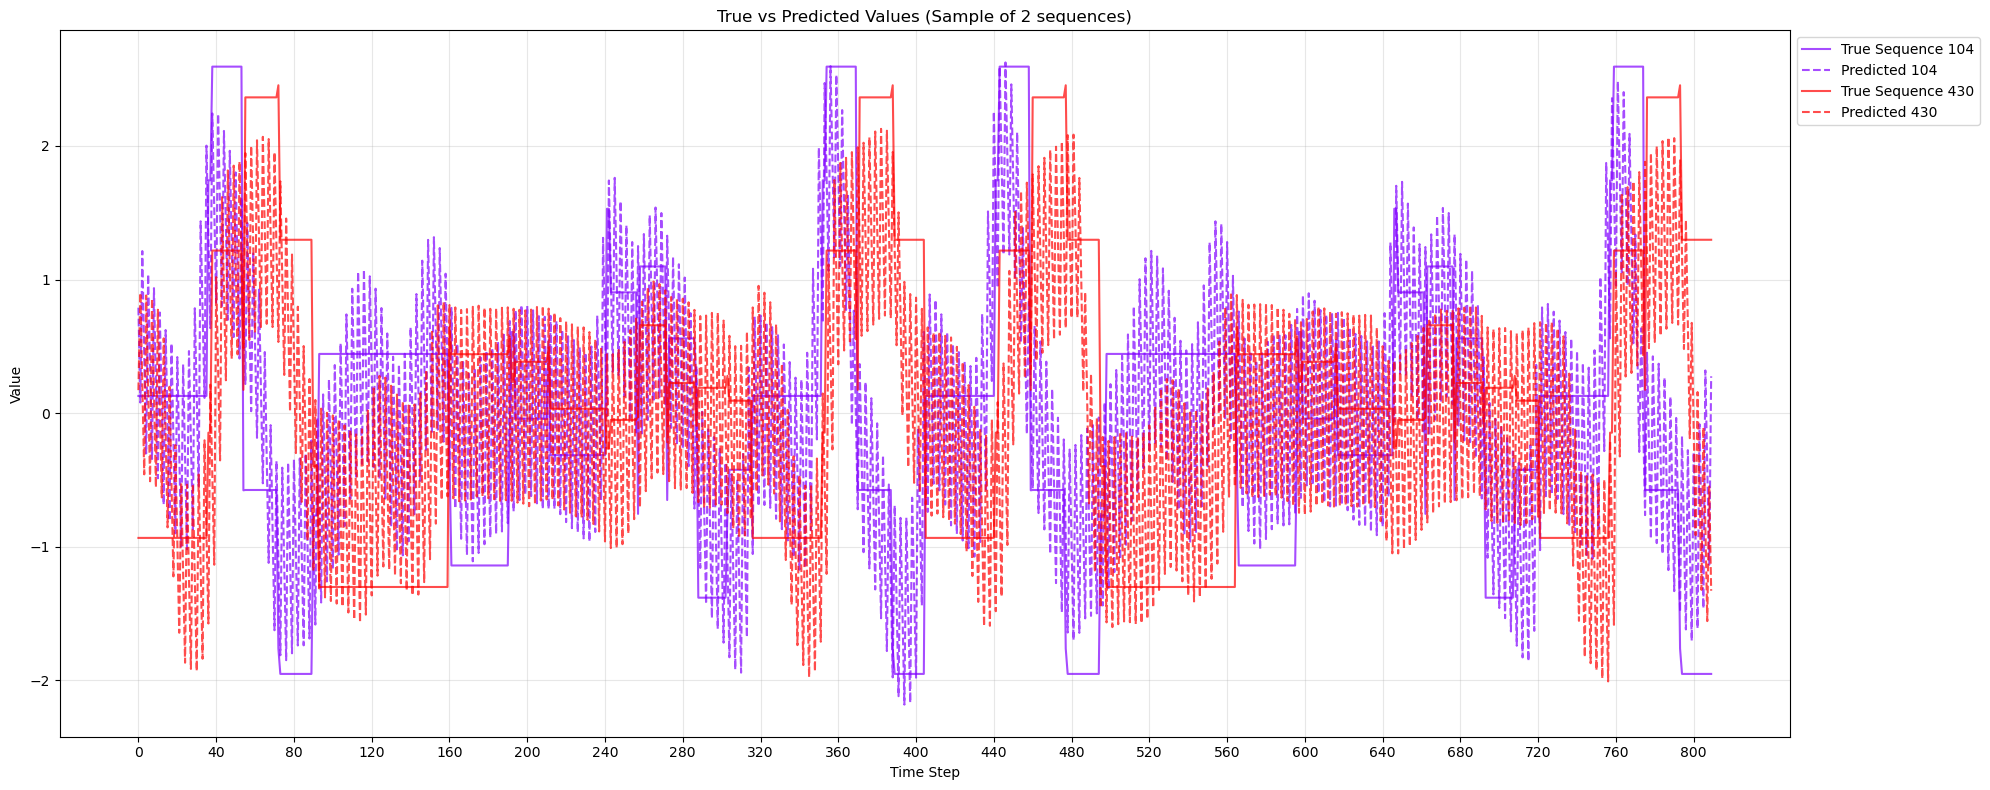

In [156]:
plot_prediction("20241216_011957", n_samples=2)